In [5]:
#Import libaries
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn 
import torch 

from IPython import display
display.set_matplotlib_formats('svg')

#Function to Build and train the model


In [9]:
def build_and_train_model(x,y):
  
  #Build the model
  ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation layer
    nn.Linear(1,1) # output layer
   )
  
  #loss and optimizer function
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(), lr = 0.05)

  #Train the model
  num_epochs = 500
  losses = torch.zeros(num_epochs)

  for epochs in range(num_epochs):

    #Forward prop
    yhat = ANNreg(x)

     #loss function 
    loss = lossfun(yhat,y)
    losses[epochs] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #computer model predictions
  predictions = ANNreg(x)

  return predictions, losses

  




# Function that creates the data

In [10]:
def createTheData(m):
   N = 50
   x = torch.randn(N,1)
   y = m * x + torch.randn(N,1)/2
   return x,y




# Testing the model

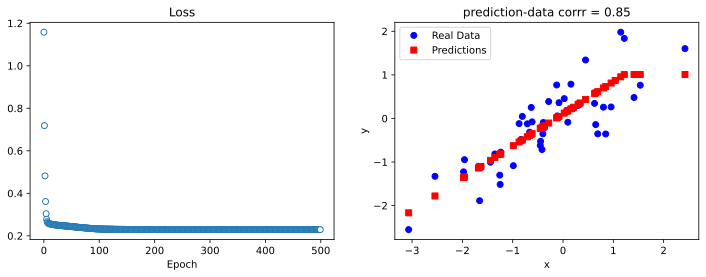

In [11]:
x,y = createTheData(0.7)


#run the model

yhat, losses = build_and_train_model(x,y)

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y,'bo', label ='Real Data')
ax[1].plot(x, yhat.detach(), 'rs', label = 'Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corrr = {np.corrcoef(y.T, yhat.detach().T)[0,1]:.2f}')
ax[1].legend()


# Experiment

In [13]:
# The slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix 
results = np.zeros((len(slopes), numExps, 2))

for slopei in range(len(slopes)):

  for N in range(numExps):
    x,y = createTheData(slopes[slopei])
    yhat, losses = build_and_train_model(x,y)


    #store the final loss and performance 
    results[slopei, N, 0] = losses[-1]
    results[slopei, N, 1] = np.corrcoef(y.T, yhat.detach().T)[0,1]

results[np.isnan(results)] = 0

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
